# 🐍 ML with Python Part 2

The first cell was lagging a bit probably because of some crazy markup stuff so time to make a new notebook, starting about halfway through the classification module.

## Intro to Logistic Regression

Can be used for both binary and for multiclass classification

Not only does it predict the class, but can predict the probability of a case belonging to each class.

Good for when you need a linear decision boundary

## Logistic Regression Lab

In [37]:
# !wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [40]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn'] = df['churn'].astype('int')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [41]:
df.shape

(200, 10)

In [42]:
target = 'churn'

X = df[[col for col in df.columns if not col == target]]
y = df[target]
X.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0


Scaling the features manually for good practice.

In [43]:
for col in X.columns:
    X[col] = X[col].apply(lambda i: (i - X[col].mean())/X[col].std())

X.describe()

/var/folders/4f/6c2p53ln64s21k6dzcxg0hj00000gn/T/ipykernel_54513/3589036616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].apply(lambda i: (i - X[col].mean())/X[col].std())


,tenure,age,address,income,ed,employ,equip,callcard,wireless
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.287859e-16,7.105427e-17,-2.220446e-17,2.664535e-17,-1.776357e-16,3.108624e-17,-5.329071e-17,7.993606e-17,8.881784e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.594429e+00,-1.694986e+00,-1.146832e+00,-5.149090e-01,-1.419626e+00,-1.141510e+00,-8.575749e-01,-1.542038e+00,-6.375017e-01
25%,-8.666432e-01,-7.773306e-01,-8.515105e-01,-3.436101e-01,-6.417488e-01,-8.065930e-01,-8.575749e-01,-1.542038e+00,-6.375017e-01
50%,-9.264834e-02,-8.908905e-02,-2.608674e-01,-2.112427e-01,1.361285e-01,-3.042167e-01,-8.575749e-01,6.452500e-01,-6.375017e-01
75%,9.123897e-01,7.520951e-01,6.250973e-01,3.791935e-02,9.140058e-01,7.563553e-01,1.160248e+00,6.452500e-01,1.560780e+00
max,1.686385e+00,2.663877e+00,3.578313e+00,1.240259e+01,1.691883e+00,3.770613e+00,1.160248e+00,6.452500e-01,1.560780e+00


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 9), (160,), (40, 9), (40,))

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(X_train, y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

In [46]:
pred = lr.predict(X_test)
pred[:5]

array([0, 0, 0, 0, 0])

In [47]:
pred_prob = lr.predict_proba(X_test)
pred_prob[:5]

array([[0.59, 0.41],
       [0.57, 0.43],
       [0.53, 0.47],
       [0.67, 0.33],
       [0.53, 0.47]])

In [48]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, pred)

0.3181818181818182

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, pred, labels=[1,0]))

[[ 7  8]
 [ 7 18]]


Confusion matrix, without normalization
[[ 7  8]
 [ 7 18]]


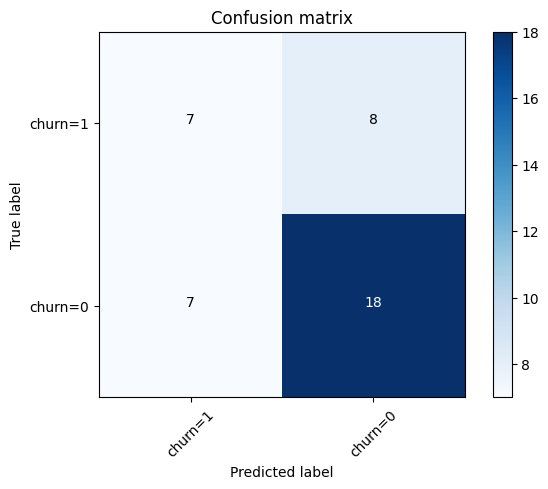

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71        25
           1       0.50      0.47      0.48        15

    accuracy                           0.62        40
   macro avg       0.60      0.59      0.59        40
weighted avg       0.62      0.62      0.62        40



In [52]:
from sklearn.metrics import log_loss

log_loss(y_test, pred)

13.516370020918933

## Support Vector Machines (SVMs)

**SVM** is a supervised algorithm that classifies cases by finding a separator
1) Maps data to a **high-dimensional** feature space
2) Estimates a **separator** which could be drawn as a hyperplane

So you have a **linearly nonseparable** dataset e.g.
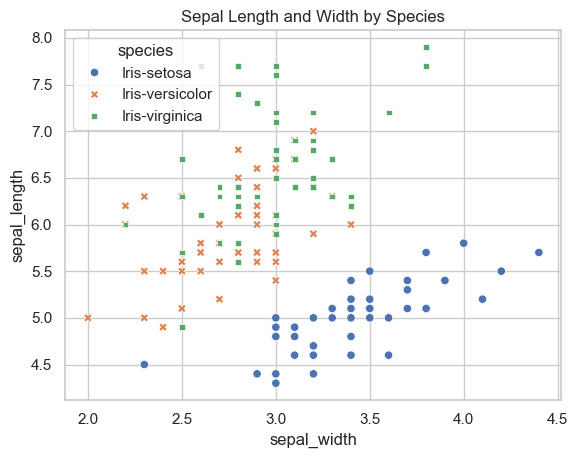

You can translate the data to a higher-dimensional space (e.g. 3d) and then find a separator.

*How do we transfer data in such a way that a separator can be drawn as a hyperplane*

You can map it to a function that maps it to a new space e.g.

$\theta(x) = [x, x^{2}]$

This form of mapping data into a higher-dimensional space is called **kernelling**

Usually there is no easy way of knowing which transformation function will perform best, so we will choose different functions and compare the results.

*How can we find the best/optimized hyperplane separator after transformation?*

You want the larget separation of margin between the classes (as big a margin as possible). The data points that are closest to the hyperplane are **support vectors**, which are the only things that really matter (other data points can more-or-less be ignored).

So in essence we want to find the hyperplane in such a way that it has the maximum distance to support vectors.

Advantages:
1) accurate in high-dimensional spaces
2) memory efficient

Disadvantages:
1) prone to over-fitting
2) no probability estimation
3) not very computationally-efficient if you have a very big dataset

SVM is good for image classification and hand-written digit recognition.

Also good for text-mining tasks because it is effective in dealing with high-dimensional data.

Also good for regression, outlier detection, and clustering.

## 🧪 SVM Lab

The data can be loaded from (this link)[https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv]

In [3]:
import pandas as pd

df = pd.read_csv('./cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<Axes: xlabel='Clump', ylabel='UnifSize'>

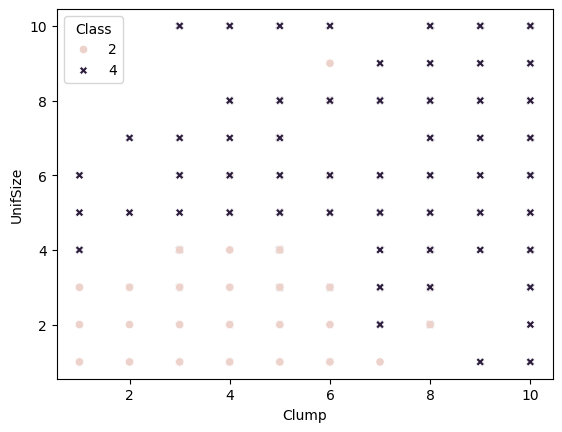

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

target = 'Class'
sns.scatterplot(data=df, x='Clump', y='UnifSize', hue=target, style=target)

In [9]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [10]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [11]:
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [12]:
y = df[target]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((546, 9), (137, 9), (546,), (137,))

Possible kernel values include:
1) Linear
2) Polynomial
3) Radial basis function (RBF)
4) Sigmoid

In [25]:
from sklearn import svm
# clf = svm.SVC(kernel='linear', 'poly', 'sigmoid', 'rbf')
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
clf

SVC()

In [26]:
pred = clf.predict(X_test)
pred[:5]

array([2, 4, 2, 4, 2])

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import numpy as np

cnf_matrix = confusion_matrix(y_test, pred, labels=[2, 4])
np.set_printoptions(precision=2)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


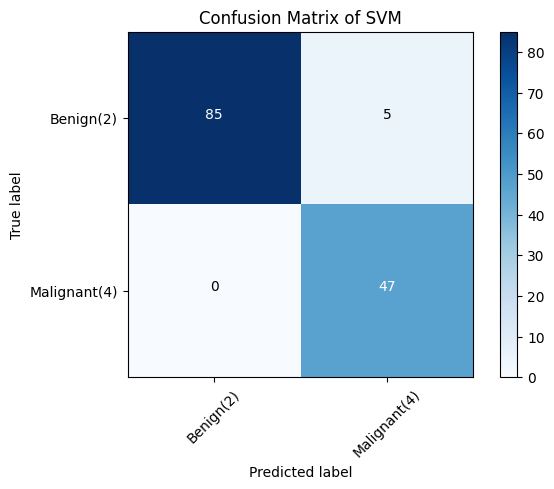

In [29]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Benign(2)', 'Malignant(4)'], normalize=False, title="Confusion Matrix of SVM")

In [30]:
from sklearn.metrics import f1_score

f1_score(y_test, pred, average='weighted')

0.9639038982104676

In [31]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, pred, pos_label=2)

0.9444444444444444

### Testing other Kernel Functions

**Poly** is a little better

In [34]:
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
for kernel in kernels:
    print(kernel, '\n', '-' * 100)
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(classification_report(y_test, pred))
    print("F1 Score", f1_score(y_test, pred, average='weighted'))
    print("jaccard_score: ", jaccard_score(y_test, pred, pos_label=2))
    print()

linear 
 ----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

F1 Score 0.9639038982104676
jaccard_score:  0.9444444444444444

poly 
 ----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

F1 Score 0.9710669934861801
jaccard_score:  0.9555555555555556

